# ★☆ Assignment ☆★

## 우리의 목표 : 나이브베이즈 문제 해결하기
1.1) 입력문서가 {fast, furious, fun} 만을 주요 단어로 가질때, 이 문서는 얼마의 확률로 어떤 문서로 분류되는가?

##### 노트북 파일을 따라오면서, 빈칸과 질문에 대한 물음을 모두 채우시면 과제 완료 입니다 : )

### 1. 주어진 dataset 을 확인해 보기위해 엑셀 파일을 읽습니다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
documents = pd.read_excel('test_file.xlsx') 

In [3]:
documents 

label                        message
0  comedy          Fun couple, love love
1  action          fast Furious, shoot!!
2  comedy  couple^^, fly, fast, fun, fun
3  action       furious, shoot shoot fun
4  action         fly~~ fast shoot, Love

### 2. 파일에 어떤 문제점이 보이시나요? (어떤 부분을 전처리 해주어야 할까요?)

####  Q1. 발견한 문제점(전처리가 필요한 부분)을 2가지 이상 적어주세요.
- 1. 특수문자 처리
- 2. 대소문자 구분

### step 1. 단어를 모두 소문자로 바꾸어 줍니다. 
#### Q2.왜 이 과정이 필요할까요? 
- A. 대문자와 소문자가 같이 있을 경우 다른 단어로 카운트 되므로

#### Q3. 코드속 빈칸을 채워주세요

In [4]:
lower_documents = []
lower_documents = [d.lower() for d in documents['message']]
print(lower_documents)

['fun couple, love love', 'fast furious, shoot!!', 'couple^^, fly, fast, fun, fun', 'furious, shoot shoot fun', 'fly~~ fast shoot, love']


### step2. 특수문자를 없애줍니다.
#### string.punctuation 에는 특수문자들이 저장되어있는것을 확인할수 있습니다.

In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Q4. string.punctuation 을 이용해서 특수문자를 제거해주세요.

In [6]:
import re

del_punctuation_documents = []

for i in lower_documents:
    del_punctuation_documents.append(re.sub('['+string.punctuation+']', '',i))
    
del_punctuation_documents

['fun couple love love',
 'fast furious shoot',
 'couple fly fast fun fun',
 'furious shoot shoot fun',
 'fly fast shoot love']

### step 3. 단어를 하나씩 띄어쓰기 단위로 쪼개어 줍니다.
#### Q5. 빈칸을 채워주세요.

In [7]:
preprocessed_documents = [[w for w in d.split(' ')] for d in del_punctuation_documents]
preprocessed_documents

[['fun', 'couple', 'love', 'love'],
 ['fast', 'furious', 'shoot'],
 ['couple', 'fly', 'fast', 'fun', 'fun'],
 ['furious', 'shoot', 'shoot', 'fun'],
 ['fly', 'fast', 'shoot', 'love']]

### step 4. 각각의 단어가 문서에서 몇번 나왔는지 세봅시다.

In [8]:
frequency_list = []
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
frequency_list

[Counter({'fun': 1, 'couple': 1, 'love': 2}),
 Counter({'fast': 1, 'furious': 1, 'shoot': 1}),
 Counter({'couple': 1, 'fly': 1, 'fast': 1, 'fun': 2}),
 Counter({'furious': 1, 'shoot': 2, 'fun': 1}),
 Counter({'fly': 1, 'fast': 1, 'shoot': 1, 'love': 1})]

### step 5. 이제 우리가 하고싶은것은, 문자를 숫자로 변환하는 작업입니다!(그림 참고)
- 이를 위해 CountVectorizer를 사용합니다.
- CountVectorizer는 문서 집합에서 단어 토큰을 생성하고, 각 단어 수를 세어 BOW (Bag of Words) 인코딩한 벡터를 만들어줍니다.

- 문서에 해당단어가 몇번 포함되었는지를 나타낼 때 사용하는 방법입니다.

- 참고 : https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/

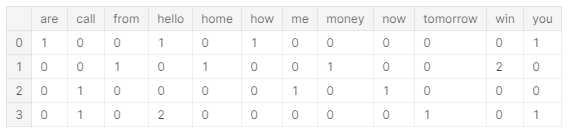

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(documents['message'])

CountVectorizer()

In [10]:
doc_array = count_vector.transform(documents['message']).toarray()
doc_array

array([[1, 0, 0, 1, 0, 2, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 2, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 2],
       [0, 1, 1, 0, 0, 1, 1]], dtype=int64)

In [11]:
count_vector.get_feature_names()

['couple', 'fast', 'fly', 'fun', 'furious', 'love', 'shoot']

In [12]:
count_vector.vocabulary_

{'fun': 3,
 'couple': 0,
 'love': 5,
 'fast': 1,
 'furious': 4,
 'shoot': 6,
 'fly': 2}

In [13]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

couple  fast  fly  fun  furious  love  shoot
0       1     0    0    1        0     2      0
1       0     1    0    0        1     0      1
2       1     1    1    2        0     0      0
3       0     0    0    1        1     0      2
4       0     1    1    0        0     1      1

In [14]:
frequency_matrix['count'] = frequency_matrix.sum(axis=1)

### step 6. 범주형 변수를 dummy변수로 변환해주는 작업(One-Hot Encoding!)을 해주어야합니다.
#### Q6. label 을 comedy =1, action =0 으로 변환해주세요

In [15]:
documents["label"]= documents['label'].map(lambda x: 1 if x=='comedy' else 0)

In [16]:
doc = pd.concat([documents['label'],frequency_matrix],axis=1)

In [17]:
doc

label  couple  fast  fly  fun  furious  love  shoot  count
0      1       1     0    0    1        0     2      0      4
1      0       0     1    0    0        1     0      1      3
2      1       1     1    1    2        0     0      0      5
3      0       0     0    0    1        1     0      2      4
4      0       0     1    1    0        0     1      1      4

###  step 7. 나이브 베이즈 계산을 해봅시다!

#### Q7. 입력문서가 {fast, furious, fun} 을 주요 단어로 가질때, 이 문서는 얼마의 확률로 어떤 문서로 분류가 될까요? ( 계산과정을 채워주세요) 

In [18]:
doc =  np.array(doc)           # dataframe을 np-array로 변환해줍니다.
                         # return값은 np-matrix가 아니라 np-array입니다.
doc

array([[1, 1, 0, 0, 1, 0, 2, 0, 4],
       [0, 0, 1, 0, 0, 1, 0, 1, 3],
       [1, 1, 1, 1, 2, 0, 0, 0, 5],
       [0, 0, 0, 0, 1, 1, 0, 2, 4],
       [0, 0, 1, 1, 0, 0, 1, 1, 4]], dtype=int64)

In [19]:
type(doc)

numpy.ndarray

####  P(Y=comedy), P(Y=action) 계산하기

In [20]:
# P(Y=comedy)
p_comedy = sum(doc[:,0]==1) / len(doc)

# P(Y=action)
p_action = sum(doc[:,0]==0) / len(doc)

In [21]:
print('p_comedy : ',p_comedy)
print('p_action : ', p_action)

p_comedy :  0.4
p_action :  0.6


#### P(fast=1|comedy=1), P(furious=1|comedy=1), P(fun=1|comedy=1) 계산하기
* 참고 : 문서에 두번 등장한 단어 주의

In [50]:
# P(fast=1|comedy=1)
p_comedy_fast = sum(doc[(doc[:,2] >= 1) & (doc[:,0] == 1)][:,2]) / sum(doc[doc[:,0] == 1][:,8])

# P(furious=1|comedy=1)
p_comedy_furious = sum(doc[(doc[:,5] >= 1) & (doc[:,0] == 1)][:,5]) / sum(doc[doc[:,0] == 1][:,8]) 

# P(fun=1|comedy=1)
p_comedy_fun = sum(doc[(doc[:,4]>=1) & (doc[:,0] == 1)][:,4]) / sum(doc[doc[:,0] == 1][:,8])

In [51]:
print('p_comedy_fast : ' , p_comedy_fast)
print('p_comedy_furious : ' , p_comedy_furious)
print('p_comedy_fun : ' , p_comedy_fun)   

p_comedy_fast :  0.1111111111111111
p_comedy_furious :  0.0
p_comedy_fun :  0.3333333333333333


#### P(fast=1|action=1), P(furious=1|action=1), P(fun=1|action=1) 계산하기
* 참고 : 문서에 두번 등장한 단어 주의

In [52]:
# P(fast=1|action=1)
p_action_fast = sum(doc[(doc[:,2] >= 1) & (doc[:,0] == 0)][:,2]) / sum(doc[doc[:,0] == 0][:,8])

# P(furious=1|action=1)
p_action_furious = sum(doc[(doc[:,5] >= 1) & (doc[:,0] == 0)][:,5]) / sum(doc[doc[:,0] == 0][:,8]) 

# P(fun=1|action=1)
p_action_fun = sum(doc[(doc[:,4]>=1) & (doc[:,0] == 0)][:,4]) / sum(doc[doc[:,0] == 0][:,8])

In [53]:
print('p_action_fast : ' , p_action_fast)
print('p_action_furious : ' , p_action_furious)
print('p_action_fun : ' , p_action_fun)  

p_action_fast :  0.18181818181818182
p_action_furious :  0.18181818181818182
p_action_fun :  0.09090909090909091


#### P(Y = comedy| X = fast, furious, fun) , P(Y = action=1| X = fast, furious, fun) 값 계산하기

In [54]:
#P(Y = comedy| X = fast, furious, fun)
proba_comedy = (p_comedy_fast*p_comedy_fun*p_comedy_furious*p_comedy)

#P(Y = action=1| X = fast, furious, fun)
proba_action = (p_action_fast*p_action_fun*p_action_furious*p_action) 

In [55]:
print('proba_comedy', proba_comedy)
print('proba_action', proba_action)

proba_comedy 0.0
proba_action 0.0018031555221637867


### step 8. 다음 값을 비교해봅시다.
1. P(Y = comedy| X = fast, furious, fun)
2. P(Y = action=1| X = fast, furious, fun)


Q8. 어떤 문제점을 발견할수 있나요? 문제점을 해결하기 위한 방법으로는 어떤게 있을까요?
- A. p_comedy_furious = 0이라서 proba_comedy의 확률이 0이 된다. 라플라스 스무딩을 이용해 likelihood가 0이 되는 것을 방지하도록 최소한의 확률을 정해준다